In [1]:
'''
folderPath = "embdFiles/"
f_file = "fake_"
endN = "_FAKE.txt"
listNouns = ['article','beard','blood','company','death','gun','id','interview','passport']
for noun in listNouns:
    fPath = folderPath + f_file + noun + endN
    arrF = np.genfromtxt(fPath,delimiter=' ',dtype='float32')
    with open('files/FAKE'+ noun+'FAKE.npy','wb') as f:
        np.save(file=f,arr=arrF)
    print("done for "+noun)
'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cols = ['fileName','noun','size','start','end']
indexer = pd.DataFrame(columns=cols)
fakes = pd.DataFrame(columns=range(1024))

In [4]:
listNouns = ['article','beard','blood','company','death','gun','id','interview','passport']
for noun in listNouns:
    arrF = np.load('files/FAKE'+noun+'FAKE.npy')
    count=len(fakes)
    fakes = fakes.append(pd.DataFrame(arrF),ignore_index=True)
    d_temp = pd.DataFrame(data=[[noun+'FAKE.npy',noun,arrF.shape[0],count,len(fakes)-1]],columns=cols)
    indexer = indexer.append(d_temp,ignore_index=True)
    
    print("done for "+noun)

done for article
done for beard
done for blood
done for company
done for death
done for gun
done for id
done for interview
done for passport


In [5]:
fakes

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.026731,-0.022479,0.181596,0.063427,0.143434,0.505382,0.318516,0.207427,0.042229,0.670690,...,0.631010,0.790113,-0.034639,-0.409717,0.148337,0.296040,-0.224013,0.413704,-0.033352,0.190116
1,0.422661,-0.446202,0.996371,-0.526267,0.342233,0.642562,0.631784,0.268036,-0.136144,-0.046200,...,0.698070,1.051745,-0.011725,-0.143240,0.190387,-0.822657,-0.864716,0.643169,0.167382,-0.374945
2,0.208961,-0.398749,0.913252,-0.088313,0.255677,0.625717,0.223300,0.592320,0.158232,0.564321,...,0.263242,0.653687,0.299465,-0.773956,0.431308,0.032365,-0.396035,0.870504,-0.026741,0.300267
3,-0.033709,-0.288444,0.629118,0.056776,0.715655,0.427890,1.097237,0.526606,0.442940,0.419388,...,0.259359,0.646777,0.290017,-0.782687,0.428186,0.032254,-0.395898,0.843707,0.000936,0.295757
4,0.140274,-0.350094,0.425740,-0.101696,0.406470,0.445741,0.879036,0.811289,0.548282,0.782475,...,0.722912,0.820634,-0.153438,-1.040250,0.336978,0.427941,-0.109400,0.613933,-0.102024,0.477616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.582677,-0.231728,0.249254,0.089958,0.881324,0.252513,0.205101,0.330714,-0.444003,0.388951,...,0.966248,0.135230,0.714246,-0.273435,0.567449,-0.304936,-0.753693,-0.287817,0.267605,-0.099369
595,0.341732,-0.771228,0.748192,-0.542309,0.138273,-0.363658,-0.122650,-0.106051,0.122122,0.344518,...,0.607761,-0.118869,0.325967,-0.952818,0.572553,-0.327006,-0.156031,-0.081134,-0.040249,-0.049351
596,0.348122,-0.398833,0.790428,0.054292,1.190812,-0.019278,0.994067,0.404543,0.523599,0.426416,...,0.626585,-0.156646,0.559678,-0.666924,0.600809,-0.194516,-0.536977,-0.329262,-0.107174,0.190685
597,0.456974,0.560185,0.808718,-0.042955,0.955121,0.097916,0.999905,-0.112274,0.231442,0.717916,...,0.306862,0.211646,-0.510905,-0.365576,0.655309,0.027319,-0.445158,0.195217,-0.823859,-0.123691


In [6]:
priv = ['beard','blood','company','death','gun']
indexer.insert(loc=3,column='privative',value=False)
for index, row in indexer.iterrows():
    if row['noun'] in priv:
        indexer.at[index,'privative']= True

In [7]:
indexer

,fileName,noun,size,privative,start,end
0,articleFAKE.npy,article,82,False,0,81
1,beardFAKE.npy,beard,44,True,82,125
2,bloodFAKE.npy,blood,150,True,126,275
3,companyFAKE.npy,company,25,True,276,300
4,deathFAKE.npy,death,46,True,301,346
5,gunFAKE.npy,gun,24,True,347,370
6,idFAKE.npy,id,96,False,371,466
7,interviewFAKE.npy,interview,30,False,467,496
8,passportFAKE.npy,passport,102,False,497,598


In [8]:
priv_fakes_idx = indexer[indexer.privative]
priv_fakes_idx

,fileName,noun,size,privative,start,end
1,beardFAKE.npy,beard,44,True,82,125
2,bloodFAKE.npy,blood,150,True,126,275
3,companyFAKE.npy,company,25,True,276,300
4,deathFAKE.npy,death,46,True,301,346
5,gunFAKE.npy,gun,24,True,347,370


In [9]:
if 'priv' in fakes.columns:
    fakes = fakes.drop(columns=['priv'])
    
fakes.insert(loc=1024,column='priv',value=-1)
for index, row in priv_fakes_idx.iterrows():
    for i in range(row['start'],row['end']+1):
        fakes.at[i,'priv']= 1


if 'noun' in fakes.columns:
    fakes = fakes.drop(columns=['noun'])
    
fakes.insert(loc=1024,column='noun',value='')
for index, row in indexer.iterrows():
    for i in range(row['start'],row['end']+1):
        fakes.at[i,'noun']= row['noun']

targets = fakes['priv']
nouns = fakes['noun']
X = fakes.drop(columns=['priv','noun'])
fakes

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,noun,priv
0,0.026731,-0.022479,0.181596,0.063427,0.143434,0.505382,0.318516,0.207427,0.042229,0.670690,...,-0.034639,-0.409717,0.148337,0.296040,-0.224013,0.413704,-0.033352,0.190116,article,-1
1,0.422661,-0.446202,0.996371,-0.526267,0.342233,0.642562,0.631784,0.268036,-0.136144,-0.046200,...,-0.011725,-0.143240,0.190387,-0.822657,-0.864716,0.643169,0.167382,-0.374945,article,-1
2,0.208961,-0.398749,0.913252,-0.088313,0.255677,0.625717,0.223300,0.592320,0.158232,0.564321,...,0.299465,-0.773956,0.431308,0.032365,-0.396035,0.870504,-0.026741,0.300267,article,-1
3,-0.033709,-0.288444,0.629118,0.056776,0.715655,0.427890,1.097237,0.526606,0.442940,0.419388,...,0.290017,-0.782687,0.428186,0.032254,-0.395898,0.843707,0.000936,0.295757,article,-1
4,0.140274,-0.350094,0.425740,-0.101696,0.406470,0.445741,0.879036,0.811289,0.548282,0.782475,...,-0.153438,-1.040250,0.336978,0.427941,-0.109400,0.613933,-0.102024,0.477616,article,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.582677,-0.231728,0.249254,0.089958,0.881324,0.252513,0.205101,0.330714,-0.444003,0.388951,...,0.714246,-0.273435,0.567449,-0.304936,-0.753693,-0.287817,0.267605,-0.099369,passport,-1
595,0.341732,-0.771228,0.748192,-0.542309,0.138273,-0.363658,-0.122650,-0.106051,0.122122,0.344518,...,0.325967,-0.952818,0.572553,-0.327006,-0.156031,-0.081134,-0.040249,-0.049351,passport,-1
596,0.348122,-0.398833,0.790428,0.054292,1.190812,-0.019278,0.994067,0.404543,0.523599,0.426416,...,0.559678,-0.666924,0.600809,-0.194516,-0.536977,-0.329262,-0.107174,0.190685,passport,-1
597,0.456974,0.560185,0.808718,-0.042955,0.955121,0.097916,0.999905,-0.112274,0.231442,0.717916,...,-0.510905,-0.365576,0.655309,0.027319,-0.445158,0.195217,-0.823859,-0.123691,passport,-1


In [10]:
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

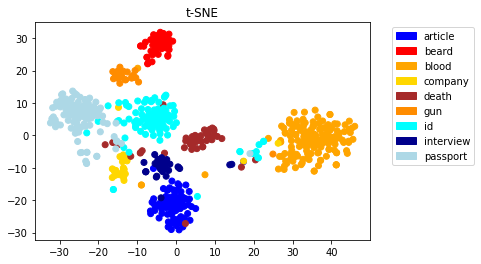

In [11]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(X).T

colors={'article':'blue','beard':'red','blood':'orange','company':'gold','death':'brown','gun':'darkorange','id':'aqua','interview':'darkblue','passport':'lightblue'}

plt.scatter(trans_data[0], trans_data[1], color=nouns.map(colors))
handles = [mpatches.Patch(color=colors[n],label=n) for n in ('article','beard','blood','company','death','gun','id','interview','passport')]
plt.legend(handles = handles,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("t-SNE")
plt.axis('tight')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.decomposition import PCA


from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression as LR

In [13]:
#The training set should be balanced in term of repartition of nouns

Xtrain,Xtest,Ttrain,Ttest =train_test_split(X, targets, test_size=0.4, random_state=0, stratify=nouns,shuffle=True)

#Preview the balancing of the dataset
nouns.loc[Xtrain.index].value_counts()/len(Xtrain)

blood        0.250696
passport     0.169916
id           0.161560
article      0.136490
death        0.077994
beard        0.072423
interview    0.050139
company      0.041783
gun          0.038997
Name: noun, dtype: float64

In [14]:
model = make_pipeline(Scaler(),KNN(3))
model.fit(Xtrain,Ttrain)
y_train = model.predict(Xtrain)
y_test = model.predict(Xtest)

Tacc = np.sum(Ttrain == y_train)/len(Xtrain)
Gacc = np.sum(Ttest == y_test)/len(Xtest)

print(Tacc,Gacc)

0.9860724233983287 0.9625


In [15]:
def AccuracyRateBan(classifier,Xtrain,Ttrain,Xbanned,Tbanned):
    model = make_pipeline(Scaler(),PCA(n_components=0.975),classifier)
    model.fit(Xtrain,Ttrain)
    y_train = model.predict(Xtrain)
    Tacc = np.sum(Ttrain == y_train)/len(Xtrain)
    y_banned = model.predict(Xbanned)
    Bacc = np.sum(Tbanned == y_banned)/len(Xbanned)
    return (Tacc,Bacc)

def AvgAccBan(classifier):
    Taccs = np.zeros(len(listNouns))
    Baccs = np.zeros(len(listNouns))
    for i,bannedW in enumerate(listNouns):
        Xtrain = X[nouns!=bannedW]
        Ttrain = targets[nouns!=bannedW]
        Xbanned = X[nouns==bannedW]
        Tbanned = targets[nouns==bannedW]
        Tacc,Bacc = AccuracyRateBan(classifier,Xtrain,Ttrain,Xbanned,Tbanned)
        Taccs[i],Baccs[i] = Tacc, Bacc
    AvgTrain = np.mean(Taccs)
    AvgBanned = np.mean(Baccs)
    return (AvgTrain,AvgBanned)


models = {'NB':None,'KNN':range(2,41),'DT':range(3,11),'LR':None}
for modelName in models:
    if modelName == 'NB':
        classifier = NB()
        Tacc,Bacc =  AvgAccBan(classifier)
        print('NB ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(np.round(Tacc,4),np.round(Bacc,4)))
    elif modelName == 'LR':
        classifier = LR(n_jobs=4,multi_class='ovr')
        Tacc,Bacc =  AvgAccBan(classifier)
        print('LR ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(np.round(Tacc,4),np.round(Bacc,4)))
    elif modelName == 'KNN':
        params = models[modelName]
        Taccs = np.zeros(len(params))
        Baccs = np.zeros(len(params))
        for i,n in enumerate(params):
            classifier = KNN(n,n_jobs=4)
            Taccs[i],Baccs[i] =  AvgAccBan(classifier)
        best = np.argmax(Baccs)
        print('KNN({}) ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(params[best],np.round(Taccs[best],4),np.round(Baccs[best],4)))
    elif modelName == 'DT':
        params = models[modelName]
        Taccs = np.zeros(len(params))
        Baccs = np.zeros(len(params))
        for i,n in enumerate(params):
            classifier = DT(max_depth=n)
            Taccs[i],Baccs[i] =  AvgAccBan(classifier)
        best = np.argmax(Baccs)
        print('DT(max_depth:{}) ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(params[best],np.round(Taccs[best],4),np.round(Baccs[best],4)))
       

    




NB ------ Train Accuracy : 0.899  ||  Test Accuracy : 0.609
KNN(5) ------ Train Accuracy : 0.981  ||  Test Accuracy : 0.5056
DT(max_depth:3) ------ Train Accuracy : 0.9317  ||  Test Accuracy : 0.5997
LR ------ Train Accuracy : 1.0  ||  Test Accuracy : 0.6045


In [16]:
nouns.value_counts()

blood        150
passport     102
id            96
article       82
death         46
beard         44
interview     30
company       25
gun           24
Name: noun, dtype: int64

In [17]:
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import SelectKBest

In [20]:
def FS_AccuracyRateBan(k_features,classifier,Xtrain,Ttrain,Xbanned,Tbanned):
    model = make_pipeline(SelectKBest(MIC,k=k_features),Scaler(),classifier)
    model.fit(Xtrain,Ttrain)
    y_train = model.predict(Xtrain)
    Tacc = np.sum(Ttrain == y_train)/len(Xtrain)
    y_banned = model.predict(Xbanned)
    Bacc = np.sum(Tbanned == y_banned)/len(Xbanned)
    return (Tacc,Bacc)

def FS_AvgAccBan(k_features,classifier):
    Taccs = np.zeros(len(listNouns))
    Baccs = np.zeros(len(listNouns))
    for i,bannedW in enumerate(listNouns):
        Xtrain = X[nouns!=bannedW]
        Ttrain = targets[nouns!=bannedW]
        Xbanned = X[nouns==bannedW]
        Tbanned = targets[nouns==bannedW]
        Tacc,Bacc = FS_AccuracyRateBan(k_features,classifier,Xtrain,Ttrain,Xbanned,Tbanned)
        Taccs[i],Baccs[i] = Tacc, Bacc
    AvgTrain = np.mean(Taccs)
    AvgBanned = np.mean(Baccs)
    return (AvgTrain,AvgBanned)

k_range = [2,5,10,20,50,100,150,200,250,300,400,500,600]

In [21]:
k_best = 0
best_Bacc = 0
best_Tacc = 0
for k in k_range:
    classifier = NB()
    Tacc,Bacc =  FS_AvgAccBan(k,classifier)
    if Bacc > best_Bacc:
        k_best,best_Bacc,best_Tacc = k,Bacc,Tacc
    print('finished NB with {} features. Bacc : {}'.format(k,np.round(Bacc,4)))
print('{} features NB ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(k_best,np.round(best_Tacc,4),np.round(best_Bacc,4)))

finished NB with 2 features. Bacc : 0.7978
finished NB with 5 features. Bacc : 0.7872
finished NB with 10 features. Bacc : 0.7665
finished NB with 20 features. Bacc : 0.7466
finished NB with 50 features. Bacc : 0.6878
finished NB with 100 features. Bacc : 0.6786
finished NB with 150 features. Bacc : 0.6801
finished NB with 200 features. Bacc : 0.6585
finished NB with 250 features. Bacc : 0.6675
finished NB with 300 features. Bacc : 0.661
finished NB with 400 features. Bacc : 0.6804
finished NB with 500 features. Bacc : 0.6698
finished NB with 600 features. Bacc : 0.6684
2 features NB ------ Train Accuracy : 0.9061  ||  Test Accuracy : 0.7978


In [23]:
k_best = 0
best_Bacc = 0
best_Tacc = 0
for k in k_range:
    classifier = LR(n_jobs=5,multi_class='ovr')
    Tacc,Bacc =  FS_AvgAccBan(k,classifier)
    if Bacc > best_Bacc:
        k_best,best_Bacc,best_Tacc = k,Bacc,Tacc
    print('finished LR with {} features. Bacc : {}'.format(k,np.round(Bacc,4)))
print('{} features LR ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(k_best,np.round(best_Tacc,4),np.round(best_Bacc,4)))


finished LR with 2 features. Bacc : 0.7892
finished LR with 5 features. Bacc : 0.769
finished LR with 10 features. Bacc : 0.8176
finished LR with 20 features. Bacc : 0.8121
finished LR with 50 features. Bacc : 0.6821
finished LR with 100 features. Bacc : 0.6095
finished LR with 150 features. Bacc : 0.5815
finished LR with 200 features. Bacc : 0.5559
finished LR with 250 features. Bacc : 0.6212
finished LR with 300 features. Bacc : 0.6167
finished LR with 400 features. Bacc : 0.6229
finished LR with 500 features. Bacc : 0.5815
finished LR with 600 features. Bacc : 0.6013
10 features LR ------ Train Accuracy : 0.9575  ||  Test Accuracy : 0.8176


In [ ]:
k_best = 0
p_best = 0
best_Bacc = 0
best_Tacc = 0
params = models['DT']
for k in k_range:
    Taccs = np.zeros(len(params))
    Baccs = np.zeros(len(params))
    for i,n in enumerate(params):
        classifier = DT(max_depth = n)
        Taccs[i],Baccs[i] =  FS_AvgAccBan(k,classifier)
    best = np.argmax(Baccs)
    best_param = params[best]
    Tacc,Bacc = Taccs[best],Baccs[best]
    if Bacc > best_Bacc:
        k_best,p_best,best_Bacc,best_Tacc = k,best_param,Bacc,Tacc
    print('finished DT with {} features. Bacc ({}) : {}'.format(k,p_best,np.round(best_Bacc,4)))
print('{} features DT({}) ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(k_best,p_best,np.round(best_Tacc,4),np.round(best_Bacc,4)))

In [ ]:
k_best = 0
p_best = 0
best_Bacc = 0
best_Tacc = 0
params = models['KNN']
for k in k_range:
    Taccs = np.zeros(len(params))
    Baccs = np.zeros(len(params))
    for i,n in enumerate(params):
        classifier = KNN(n,n_jobs=5)
        Taccs[i],Baccs[i] =  FS_AvgAccBan(k,classifier)
    best = np.argmax(Baccs)
    best_param = params[best]
    Tacc,Bacc = Taccs[best],Baccs[best]
    if Bacc > best_Bacc:
        k_best,p_best,best_Bacc,best_Tacc = k,best_param,Bacc,Tacc
    print('finished KNN with {} features. Bacc ({}) : {}'.format(k,p_best,np.round(best_Bacc,4)))
print('{} features KNN({}) ------ Train Accuracy : {}  ||  Test Accuracy : {}'.format(k_best,p_best,np.round(best_Tacc,4),np.round(best_Bacc,4)))
